<a href="https://colab.research.google.com/github/VISH-creater11/plant-watering-remainder/blob/main/GEL_ELECTROPOROSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install libopencv-dev cmake g++ libomp-dev
!pip install opencv-python

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,835 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,488 kB]
Get:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubu

In [8]:
%%writefile main.cpp
#include <iostream>
#include <opencv2/opencv.hpp>
#include <omp.h>
#include <chrono>
using namespace std;
using namespace cv;
int main() {
Mat img= imread("gel.jpg", IMREAD_GRAYSCALE);
if (img.empty()) {
cout << "Error: Cannot open image!" << endl;
return -1;
}
Mat blurred, binary, edges;
               auto start_blur=std::chrono::high_resolution_clock::now();
#pragma omp parallel
{
}
#pragma omp single
GaussianBlur(img, blurred, Size(5, 5), 0);
auto stop_blur = std::chrono::high_resolution_clock::now();
auto duration_blur =
std::chrono::duration_cast<std::chrono::milliseconds>(stop_blur -
start_blur);
std::cout << "Gaussian Blur Execution time: " << duration_blur.count() << " milliseconds" << std::endl;
auto start_threshold = std::chrono::high_resolution_clock::now();
#pragma omp parallel
{
#pragma omp single
adaptiveThreshold(blurred, binary, 255, ADAPTIVE_THRESH_MEAN_C,
THRESH_BINARY, 15, 5);
}
auto stop_threshold = std::chrono::high_resolution_clock::now();
auto duration_threshold =
std::chrono::duration_cast<std::chrono::milliseconds>(stop_threshold -
start_threshold);
std::cout << "Threshold Execution time: " << duration_threshold.count() << " milliseconds" << std::endl;
auto start_sobel = std::chrono::high_resolution_clock::now();
#pragma omp parallel
               {
#pragma omp single
Sobel(binary, edges, CV_8U, 1, 0, 3);
}
auto stop_sobel = std::chrono::high_resolution_clock::now();
auto duration_sobel = std::chrono::duration_cast
<std::chrono::milliseconds>(stop_sobel - start_sobel);
std::cout << "Sobel Execution time: " << duration_sobel.count() << " milliseconds" << std::endl;
imwrite("Original_Gel_Image.jpg", img);
imwrite("Blurred_Image.jpg", blurred);
imwrite("Thresholded_Image.jpg", binary);
imwrite("Detected_Bands.jpg", edges);
return 0;
}

Overwriting main.cpp


In [10]:
!g++ main.cpp -o main `pkg-config --cflags --libs opencv4` -fopenmp

In [15]:
from google.colab import files
files.upload()   # upload gel.jpg


Saving GEL.jpg to GEL.jpg


{'GEL.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00x\x00x\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x014\x01\x9a\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x

In [16]:
%%writefile gel_processing.cpp
#include <iostream>
#include <opencv2/opencv.hpp>
#include <omp.h>
#include <chrono>
using namespace std;
using namespace cv;

int main() {
    Mat img = imread("gel.jpg", IMREAD_GRAYSCALE);
    if (img.empty()) {
        cout << "Error: Cannot open image!" << endl;
        return -1;
    }

    Mat blurred, binary, edges;

    auto start_blur = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        GaussianBlur(img, blurred, Size(5, 5), 0);
    }
    auto stop_blur = chrono::high_resolution_clock::now();
    cout << "Gaussian Blur done\n";

    auto start_threshold = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        adaptiveThreshold(blurred, binary, 255,
                          ADAPTIVE_THRESH_MEAN_C, THRESH_BINARY, 15, 5);
    }
    auto stop_threshold = chrono::high_resolution_clock::now();
    cout << "Threshold done\n";

    auto start_sobel = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        Sobel(binary, edges, CV_8U, 1, 0, 3);
    }
    auto stop_sobel = chrono::high_resolution_clock::now();
    cout << "Sobel done\n";

    imwrite("Original_Gel_Image.jpg", img);
    imwrite("Blurred_Image.jpg", blurred);
    imwrite("Thresholded_Image.jpg", binary);
    imwrite("Detected_Bands.jpg", edges);

    return 0;
}


Writing gel_processing.cpp


In [17]:
!g++ gel_processing.cpp -o gel_processing `pkg-config --cflags --libs opencv4` -fopenmp


In [21]:
!mv GEL.jpg gel.jpg


In [22]:
!./gel_processing


Gaussian Blur done
Threshold done
Sobel done


In [23]:
!ls -l


total 268
-rw-r--r-- 1 root root 20835 Nov 27 18:06 Blurred_Image.jpg
-rw-r--r-- 1 root root 51380 Nov 27 18:06 Detected_Bands.jpg
-rw-r--r-- 1 root root 25010 Nov 27 18:02 gel.jpg
-rwxr-xr-x 1 root root 31672 Nov 27 18:03 gel_processing
-rw-r--r-- 1 root root  1396 Nov 27 18:03 gel_processing.cpp
-rwxr-xr-x 1 root root 32952 Nov 27 17:55 main
-rw-r--r-- 1 root root  1789 Nov 27 17:54 main.cpp
-rw-r--r-- 1 root root 23593 Nov 27 18:06 Original_Gel_Image.jpg
drwxr-xr-x 1 root root  4096 Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 60318 Nov 27 18:06 Thresholded_Image.jpg


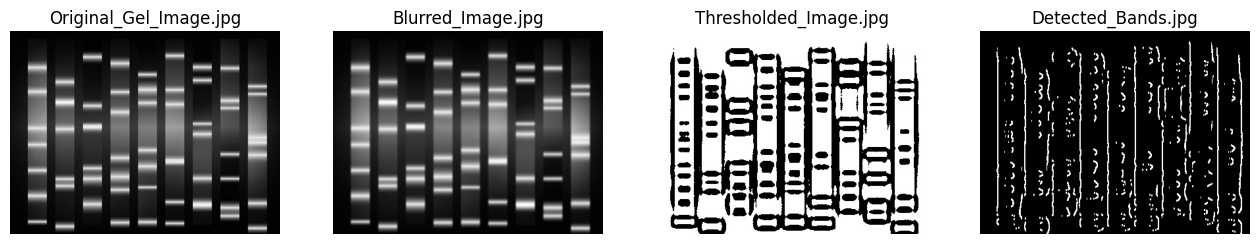

In [24]:
import cv2
import matplotlib.pyplot as plt

images = [
    "Original_Gel_Image.jpg",
    "Blurred_Image.jpg",
    "Thresholded_Image.jpg",
    "Detected_Bands.jpg"
]

plt.figure(figsize=(16,5))

for i, img_name in enumerate(images):
    img = cv2.imread(img_name, 0)
    plt.subplot(1, 4, i + 1)
    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.title(img_name)
    else:
        plt.title(f"{img_name} not found")
    plt.axis('off')

plt.show()


In [25]:
import torch, time

def cpu_task():
    s = 0
    for i in range(10**7):
        s += i
    return s

def gpu_task():
    if not torch.cuda.is_available():
        print("GPU not available, running CPU instead")
        return cpu_task()
    a = torch.randn(1000,1000, device='cuda')
    b = torch.randn(1000,1000, device='cuda')
    return (a @ b)

start = time.time()
cpu_task()
print("CPU Runtime:", time.time() - start)

start = time.time()
gpu_task()
print("GPU Runtime:", time.time() - start)


CPU Runtime: 0.5616486072540283
GPU not available, running CPU instead
GPU Runtime: 0.5908851623535156


In [26]:
# Colab: install OpenCV, compiler and OpenMP
!apt-get update -qq
!apt-get install -y -qq libopencv-dev cmake g++ libomp-dev
!pip install -q opencv-python


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [27]:
from google.colab import files
print("Upload your gel image (e.g. GEL.jpg). After upload, run the next cells.")
uploaded = files.upload()
print("Uploaded:", list(uploaded.keys()))


Upload your gel image (e.g. GEL.jpg). After upload, run the next cells.


Saving GEL.jpg to GEL.jpg
Uploaded: ['GEL.jpg']


In [28]:
%%writefile gel_processing.cpp
#include <iostream>
#include <opencv2/opencv.hpp>
#include <omp.h>
#include <chrono>
#include <vector>
#include <algorithm>

using namespace std;
using namespace cv;

static bool tryRead(const string &name, Mat &out) {
    out = imread(name, IMREAD_GRAYSCALE);
    return !out.empty();
}

int main(int argc, char** argv) {
    string filename = "gel.jpg";
    if (argc > 1) filename = string(argv[1]);

    Mat img;
    // Try provided name, then case variants
    if (!tryRead(filename, img)) {
        // try lowercase, uppercase variants, common extensions
        vector<string> tries;
        string base = filename;
        // remove extension
        size_t pos = base.find_last_of('.');
        string ext = "";
        if (pos != string::npos) {
            ext = base.substr(pos); base = base.substr(0, pos);
        } else ext = ".jpg";
        vector<string> variants = {
            base + ext,
            base + ext,
            base + ".jpg",
            base + ".JPG",
            base + ".jpeg",
            base + ".JPEG",
            "gel.jpg",
            "GEL.jpg",
            "Gel.jpg",
            "gel.JPG",
            "gel.jpeg"
        };
        bool found=false;
        for (auto &v: variants) {
            if (tryRead(v, img)) { filename = v; found=true; break; }
        }
        if(!found){
            cout << "Error: Cannot open image! Tried many names. Please upload the image and/or pass the filename as an argument." << endl;
            return -1;
        }
    }

    Mat blurred, binary, edges;
    // Gaussian blur (parallel region wrapper kept, operations themselves may be parallel internally)
    auto start_blur = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        GaussianBlur(img, blurred, Size(5,5), 0);
    }
    auto stop_blur = chrono::high_resolution_clock::now();
    cout << "Gaussian Blur done\n";

    // Adaptive threshold
    auto start_thresh = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        adaptiveThreshold(blurred, binary, 255, ADAPTIVE_THRESH_GAUSSIAN_C, THRESH_BINARY_INV, 15, 5);
        // use THRESH_BINARY_INV to make bands white (useful for contours)
    }
    auto stop_thresh = chrono::high_resolution_clock::now();
    cout << "Threshold done\n";

    // Morphological open/close to clean noise
    Mat morph;
    Mat kernel = getStructuringElement(MORPH_RECT, Size(3,3));
    morphologyEx(binary, morph, MORPH_OPEN, kernel);
    morphologyEx(morph, morph, MORPH_CLOSE, kernel);

    // Sobel (vertical emphasis)
    auto start_sobel = chrono::high_resolution_clock::now();
    #pragma omp parallel
    {
        #pragma omp single
        Sobel(morph, edges, CV_8U, 1, 0, 3);
    }
    auto stop_sobel = chrono::high_resolution_clock::now();
    cout << "Sobel done\n";

    // Save intermediates
    imwrite("Original_Gel_Image.jpg", img);
    imwrite("Blurred_Image.jpg", blurred);
    imwrite("Thresholded_Image.jpg", morph);
    imwrite("Sobel_Edges.jpg", edges);

    // Find contours on the cleaned binary (morph)
    vector<vector<Point>> contours;
    vector<Vec4i> hierarchy;
    findContours(morph, contours, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);

    // Convert original to color to draw boxes
    Mat annotated;
    cvtColor(img, annotated, COLOR_GRAY2BGR);

    // Filter and draw bounding boxes
    int count = 0;
    for (size_t i = 0; i < contours.size(); ++i) {
        double area = contourArea(contours[i]);
        if (area < 50) continue; // skip tiny noise - adjust threshold if needed
        Rect r = boundingRect(contours[i]);
        // Expand rectangle slightly
        int pad_w = max(2, r.width/30);
        int pad_h = max(2, r.height/10);
        Rect rr(max(0, r.x - pad_w), max(0, r.y - pad_h),
                min(annotated.cols - 1 - r.x + pad_w, r.width + 2*pad_w),
                min(annotated.rows - 1 - r.y + pad_h, r.height + 2*pad_h));
        rectangle(annotated, rr, Scalar(0,255,0), 2);
        count++;
    }

    imwrite("Annotated_Bands.jpg", annotated);
    cout << "Detected " << count << " candidate band regions. Saved Annotated_Bands.jpg\n";
    return 0;
}


Overwriting gel_processing.cpp


In [29]:
!g++ gel_processing.cpp -o gel_processing `pkg-config --cflags --libs opencv4` -fopenmp -O2


In [30]:
!./gel_processing GEL.jpg


Gaussian Blur done
Threshold done
Sobel done
Detected 108 candidate band regions. Saved Annotated_Bands.jpg


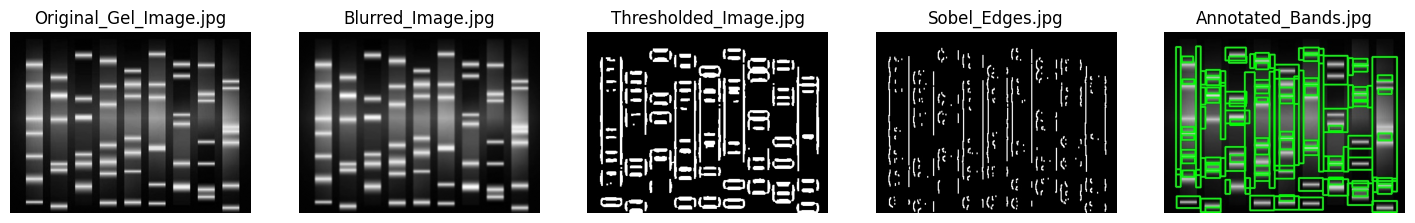

In [31]:
import cv2, matplotlib.pyplot as plt, os

files_to_show = ["Original_Gel_Image.jpg",
                 "Blurred_Image.jpg",
                 "Thresholded_Image.jpg",
                 "Sobel_Edges.jpg",
                 "Annotated_Bands.jpg"]

plt.figure(figsize=(18,6))
for i, f in enumerate(files_to_show):
    plt.subplot(1, len(files_to_show), i+1)
    if os.path.exists(f):
        img = cv2.imread(f, cv2.IMREAD_COLOR if "Annotated" in f else cv2.IMREAD_GRAYSCALE)
        # if grayscale, show with cmap gray
        if len(img.shape) == 2:
            plt.imshow(img, cmap='gray')
        else:
            # convert BGR->RGB
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f)
    else:
        plt.text(0.5, 0.5, f"{f} not found", ha='center')
    plt.axis('off')
plt.show()
